In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
 

In [2]:
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0, 10, 13]]
df_wine.columns=['class', 'color', 'proline']
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


In [14]:
# 3：データの整形-------------------------------------------------------
X=df_wine[['color', 'proline']]
# KMeansでは距離（ユークリッド距離）を計算するので、データは正規化しておく必要があります。
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

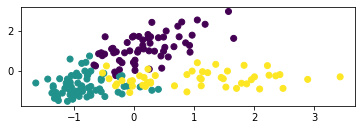

In [23]:
# 4：プロットしてみる------------------------------------------
%matplotlib inline

x=X_norm[:, 0]
y=X_norm[:, 1]
z=df_wine["class"]
plt.subplot(2, 1, 1)
plt.scatter(x,y, c=z)
plt.show()


In [28]:
# 解説4：ミニバッチk-meansやk-meansを実施---------------------------------
# データ数が1万個よりも多い場合には、MiniBatchKMeansを使用することが推奨されています。(MiniBatchKMeansは、KMeansを、全データでなくbatch_size分のデータごとに更新する手法です。)
# km=cluster.MinibatchKMeans(n_clusters=3, batch_size=100)
km=cluster.KMeans(n_clusters=3)
z_km=km.fit(X_norm)

# KMeansは簡単で分かりやすい手法でクラスタリングできます。
# ですが、注意点が2つあります。
# 1点目は事前にクラス数が分かっている必要があるということです。
# 2点目はデータが中心点から等方的に分布していると仮定している点です。
# そのため、横方向に伸びて分布しているような場合（今回のデータの黄色）は、誤って他のクラスに分類されてしまいます。

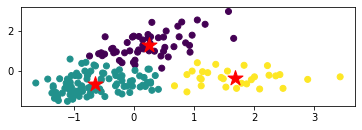

In [42]:
# 5: 結果をプロット-----------------------------------------------
plt.subplot(2, 1, 2)
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker="*", c="red")
plt.show()